In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape # 8219 rows × 4 columns

(8219, 4)

In [5]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
new_gdp_df = gdp_df.drop( columns = (['Value Footnotes']))

In [7]:
new_gdp_df.columns = ['Country','Year','GDP_Per_Capita']
new_gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [17]:
gdp_counts = new_gdp_df['Country'].value_counts()
gdp_counts

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [25]:
filtered_gdp = new_gdp_df[new_gdp_df['Country'].isin(gdp_counts[gdp_counts == 34].index)]
filtered_gdp['Country'].value_counts()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: count, Length: 228, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


HISTOGRAM PLOT

In [27]:
gdp_2020 = new_gdp_df.loc[new_gdp_df.Year.isin([2020])]
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

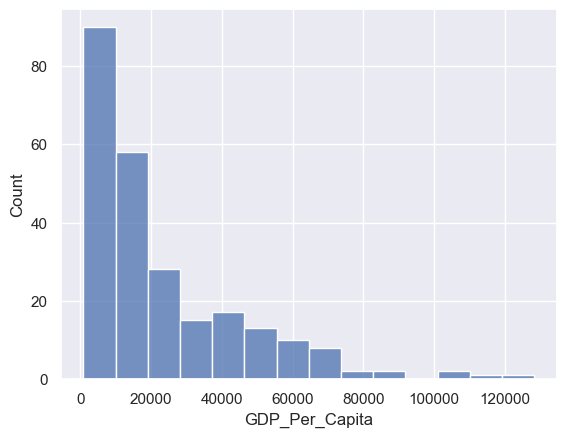

In [71]:
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")

DENSITY PLOT

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

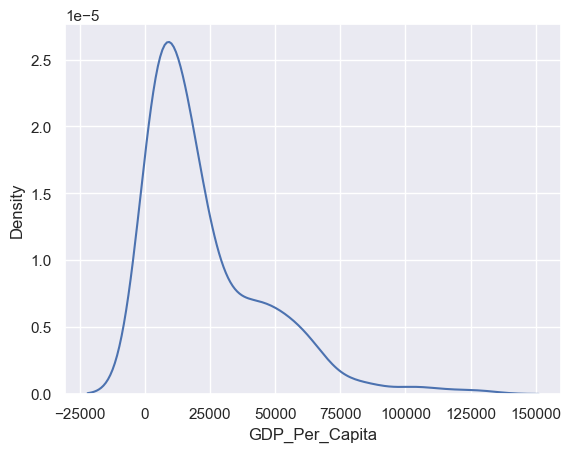

In [72]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

BOX PLOT

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

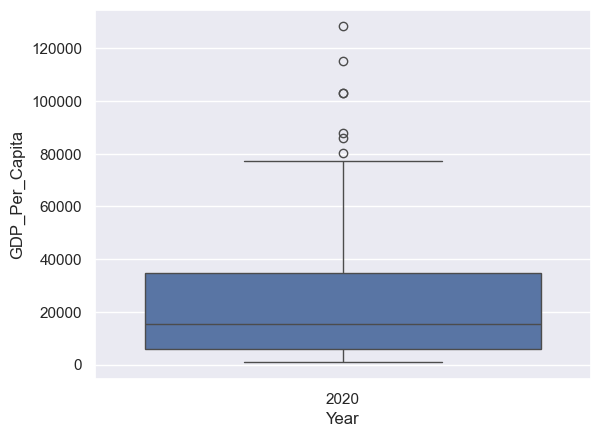

In [76]:
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

VIOLIN PLOT

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

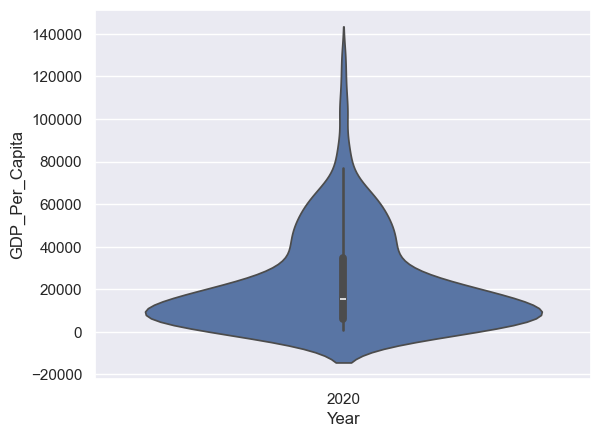

In [77]:
sns.violinplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

9. What was the median GDP per capita value in 2020?

In [79]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
